In [1]:
!pip install pandas
# You should check the place that you pip install library , can use import sys 
import sys
sys.path.insert(0, '/usr/local/lib/python3.9/site-packages')
sys.path.insert(0, '/Users/chenyan/opt/anaconda3/lib/python3.8/site-packages')
print("hello")

hello


In [3]:
import pandas as pd
import numpy as np 
print("import success ")

import success 


In [67]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt


In [42]:
#TODO 1. Import, Clean Data & Data Manipulation (Works)
survey1 = pd.read_excel('/Users/chenyan/Documents/GitHub/Capstone_Project28/Actual/Employee Engagement Survey(1-33).xlsx', header = None )
dataframe = survey1.iloc[1:,6:35]
names = ["i_0", "i_1", "i_2", "i_3", "i_4", "i_5", "w_1", "w_2", "w_3", "w_4", "w_5", "o_1", "o_2", "o_3", "o_4", "o_5", "p_1n", "p_2n", "p_3n", "p_4n", "p_5a", "p_6a", "p_7a", "c_1", "c_2", "c_3", "c_4", "c_5", "c_6"]

encode = { "i_1": {"20-29": 1, "30-39": 2, "40-49": 3, "50-59": 4, "60 and above": 5 },
            "i_2": {"Below 2 years": 1, "Below 3 years": 1, "3-5 years": 2, "6-10 years": 3, "11-19 years": 4, "20 years and above": 5},
            "i_3": {"Below 2 years": 1, "Below 3 years": 1, "3-5 years": 2, "6-10 years": 3, "11-19 years": 4, "20 years and above": 5},
}
# print(dataframe.head())
dataframe = dataframe.replace(encode)

print(dataframe.head())
dataframe.columns = names 
mapping = {1:5, 2:4, 3:3, 4:2, 5:1}
dataframe["p_1n"] = dataframe["p_1n"].map(mapping)
dataframe["p_2n"] = dataframe["p_2n"].map(mapping)
dataframe["p_3n"] = dataframe["p_3n"].map(mapping)
dataframe["p_4n"] = dataframe["p_4n"].map(mapping)


dataframe = dataframe.drop(['i_0','i_1','i_2','i_3','i_4','i_5'], axis= 1)

cols = ["w_1", "w_2", "w_3", "w_4", "w_5", "o_1", "o_2", "o_3", "o_4", "o_5", "p_1n", "p_2n", "p_3n", "p_4n", "p_5a", "p_6a", "p_7a", "c_1", "c_2", "c_3", "c_4", "c_5", "c_6"]


dataframe[cols] = dataframe[cols].apply(pd.to_numeric, errors='coerce', axis=1)

# 35 : question numbers ; 1: all staff
# print(survey1.head())
print(dataframe.head())

      6      7              8              9   \
1  25443  40-49      3-5 years    11-19 years   
2  27451  20-29  Below 2 years  Below 2 years   
3  23428  40-49      3-5 years    11-19 years   
4  15490  40-49    11-19 years    11-19 years   
5  27422  30-39  Below 2 years  Below 2 years   

                                   10                  11 12 13 14 15  ... 25  \
1  Contract Logistics/SCM  合同物流/供应链管理          Executives  4  4  5  4  ...  1   
2                     CISCO SLC LVL 6  Logistic Assistant  3  3  3  3  ...  2   
3               Human Resource  人力资源部          Executives  5  4  4  3  ...  3   
4  Contract Logistics/SCM  合同物流/供应链管理          Executives  3  3  3  3  ...  3   
5   Sales and Sales Planning  销售及销售计划          Executives  5  5  5  5  ...  3   

  26 27 28 29 30 31 32 33 34  
1  4  5  5  5  5  2  5  4  4  
2  2  5  5  3  3  3  3  3  3  
3  4  4  4  4  4  5  5  5  5  
4  3  3  4  4  4  4  4  4  4  
5  5  5  5  5  5  5  5  5  5  

[5 rows x 29 columns]
   w_1  w

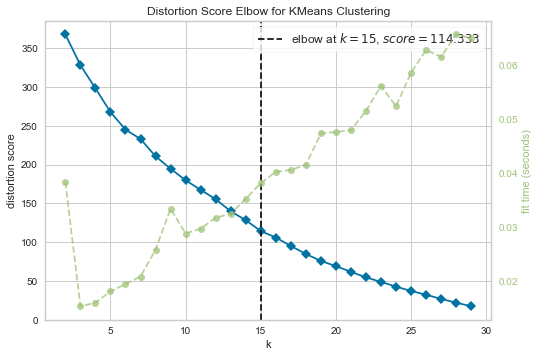

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
#TODO 1.Decide the number of cluster 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(dataframe) # Fit the data to the visualizer
visualizer.show()        # Plot

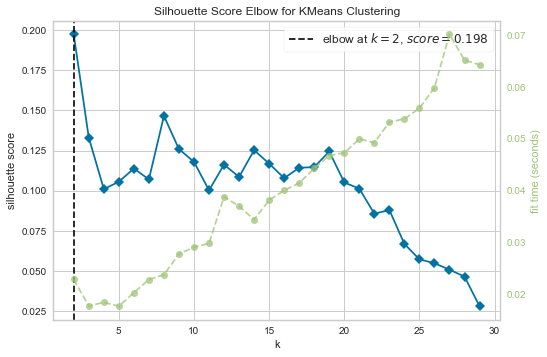

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [43]:
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(dataframe) # Fit the data to the visualizer
visualizer.show()        # Plot

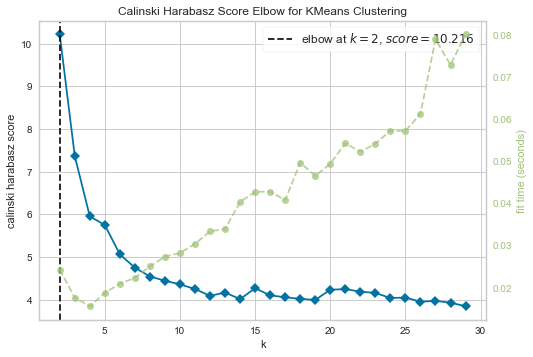

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [44]:
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(dataframe) # Fit the data to the visualizer
visualizer.show()  

In [80]:
#TODO Supervised learning
model = KMeans(n_clusters=2, random_state=0) # To determine the number of clusters & random state is like a set.seed which ensures reproducibility in the results
kmeans = model.fit(dataframe)
dataframe["Flight risk label"] = kmeans.labels_
#print("Dataframe: ", dataframe.head())
labels = np.array(dataframe['Flight risk label'])
feature_list = list(dataframe.drop(['Flight risk label'], axis = 1))
print("featurelist : " , feature_list)

# Split Data into train-test set
train_features, test_features, train_labels, test_labels = train_test_split(dataframe, labels, test_size=0.3, random_state=0)



featurelist :  ['w_1', 'w_2', 'w_3', 'w_4', 'w_5', 'o_1', 'o_2', 'o_3', 'o_4', 'o_5', 'p_1n', 'p_2n', 'p_3n', 'p_4n', 'p_5a', 'p_6a', 'p_7a', 'c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6']


In [58]:
# def evaluate_on_training_set(y_test, y_pred):
#   # Calculate AUC
# #   print("AUC is: ", roc_auc_score(y_test,y_pred))#todo print AUC score)
# #   AUC = roc_auc_score(y_test,y_pred)
#   # print out recall and precision
#   print("classfication",classification_report(y_test, y_pred))
#   report = classification_report(y_test, y_pred, output_dict= True)
#   # print out confusion matrix
#   print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
#   confusion = confusion_matrix(y_test, y_pred)
#   # # calculate points for ROC curve
#   fpr, tpr, thresholds = roc_curve(y_test, y_pred)
#   # Plot ROC curve
#   #plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_pred))
#   plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
#   plt.xlim([0.0, 1.0])
#   plt.ylim([0.0, 1.0])
#   plt.xlabel('False Positive Rate or (1 - Specifity)')
#   plt.ylabel('True Positive Rate or (Sensitivity)')
#   plt.title('Receiver Operating Characteristic')
#   rocfig = plt
#   return AUC,report,confusion,rocfig

conf_mat :  [[4 0]
 [0 6]]
accuracy:  1.0
AUC 1.0
Report:  {'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10}}
fpr:  [0. 0. 1.]
tpr [0. 1. 1.]
<module 'matplotlib.pyplot' from '/Users/chenyan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>


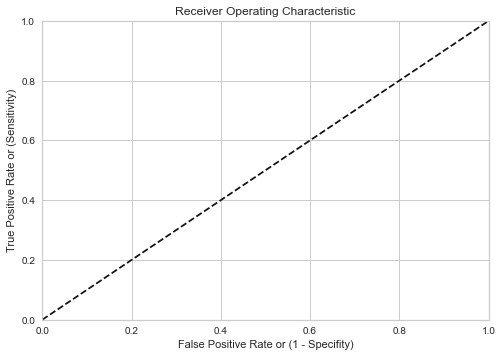

In [72]:
randomforest = RandomForestClassifier(n_estimators = 64, random_state = 0)
randomforest.fit(train_features,train_labels)
predict = randomforest.predict(test_features)
# evaluate_on_training_set(test_features, predict)
# print("evaluate2 : ", evaluate_on_training_set(test_features, predict))

conf_mat = confusion_matrix(test_labels, predict)
acc = metrics.accuracy_score(test_labels,predict)
AUC = roc_auc_score(test_labels,predict)
report = classification_report(test_labels,predict, output_dict= True)
fpr, tpr, thresholds = roc_curve(test_labels,predict)


plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
rocfig = plt

# fig = plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(test_labels,predict))

print("conf_mat : ",conf_mat)
print("accuracy: ", acc)
print("AUC", AUC)
print("Report: ", report)
print("fpr: ", fpr)
print("tpr",tpr)
print(rocfig)






In [96]:
#TODO 3. Features importance 
importances_lis = list(randomforest.feature_importances_)
feature_importances = [(feature,round(importance,2)) for feature,importance in zip(feature_list, importances_lis)]
print(feature_importances)
f = sorted(feature_importances, reverse=True)
feature_importances = sorted(feature_importances,key = lambda x: x[1], reverse = True )

# print(f)
# print(feature_importances)

[('w_1', 0.03), ('w_2', 0.06), ('w_3', 0.0), ('w_4', 0.01), ('w_5', 0.07), ('o_1', 0.05), ('o_2', 0.04), ('o_3', 0.09), ('o_4', 0.03), ('o_5', 0.02), ('p_1n', 0.01), ('p_2n', 0.0), ('p_3n', 0.01), ('p_4n', 0.02), ('p_5a', 0.05), ('p_6a', 0.05), ('p_7a', 0.08), ('c_1', 0.0), ('c_2', 0.01), ('c_3', 0.02), ('c_4', 0.03), ('c_5', 0.03), ('c_6', 0.01)]


In [99]:
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
w = sum(importances_lis[0:5])
o = sum(importances_lis[5:10])
p = sum(importances_lis[10:17])
c = sum(importances_lis[17:])

print("Wellbeing Weightage:", w)
print("Opinion Weightage:", o)
print("Personality Weightage:", p)
print("Core Values Weightage:", c)

Wellbeing Weightage: 0.17803879866891897
Opinion Weightage: 0.23163816081531177
Personality Weightage: 0.23072594870874374
Core Values Weightage: 0.35959709180702554
